In [27]:
import numpy as np
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import matplotlib.pyplot as plt
from module import * 

π=np.pi
G=4.4959e-15           #in units of M☉^-1 pc^3 yr^-2
c=0.3068               #in units of pc yr^-1
yr=3.154e7             # in units of seconds
pc=3.0857e16           # in meters

            
ρ_eq=3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_eq = 1.59246e12/yr      # in units of seconds
t   = 13.78e9               #in units of yrs corresponding to t_0=13.78Gyr
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr


σ_eq=0.005
ρ_m=4e19             #ρ_m=4e19 M☉ Gpc^-3


m_1=6   #in units of M☉
m_2=8   #in units of M☉

y_1=math.log(m_1)
y_2=math.log(m_2)
dy=(y_2-y_1)


y_list=np.zeros(50)

for i in range(len(y_list)):
    y_list[i]= (y_1+(i*dy))
    

M_1_list=np.zeros(len(y_list))
M_2_list=np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i]=(math.ceil(math.exp(y)))
    M_2_list[i]=(math.ceil(math.exp(y)))
    

            
m_1_list=[int(M_1) for M_1 in M_1_list]
m_2_list=[int(M_2) for M_2 in M_2_list]

    
Δ_1_list=np.zeros(len(y_list))
Δ_2_list=np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = math.exp(y + 0.5*dy)-math.exp(y - 0.5*dy)
    Δ_2_list[i] = math.exp(y + 0.5*dy)-math.exp(y - 0.5*dy) 



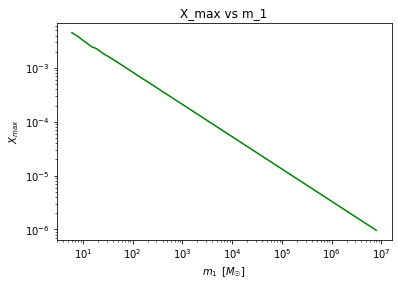

In [28]:
λ_max = λ_list[-1]

def X_max(m_1,m_2,Δ_1,Δ_2):
    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    return λ_max * f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)


f_pbh = 4.3e-3
f = 0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉
    return ((α-1)/M) * ((m/M)**(-α))



X_max_list = np.zeros(len(m_1_list))


for i, (m_1,m_2,Δ_1,Δ_2) in enumerate(zip(m_1_list,m_2_list,Δ_1_list,Δ_2_list)):
    X_max_list[i] = X_max(m_1,m_2,Δ_1,Δ_2)
    
    
    
plt.loglog(m_1_list,X_max_list,'g')
plt.xlabel('$m_{1} \hspace{0.5} [M_{☉}]$')
plt.ylabel('$X_{max}$')
plt.title('X_max vs m_1')
plt.savefig('X_max vs m_1.pdf')
plt.show()

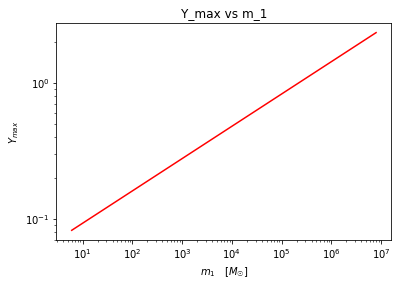

Y_max= 2.357508189888755


In [32]:
def Y_max(m_1, m_2, Δ_1, Δ_2):
    
    k=19.4965 

    A=((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def X_max(m_1, m_2, Δ_1, Δ_2):
        return λ_max  * f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)
    
    def B(m_1,m_2,Δ_1,Δ_2):
        return (A**(1/7)) * ((m_1 * m_2 * t* ((m_1+m_2)**(-1/3)))**(1/7))* ((f**2 + 1.2009*(σ_eq**2))**(-1/2)) * ((f_b(m_1,m_2))**(37/21)) * ((Δ_1*Δ_2)**(37/42))
    

    return B(m_1,m_2,Δ_1,Δ_2) * ((X_max(m_1,m_2,Δ_1,Δ_2))**(-37/21))



Y_max_list = np.zeros(len(m_1_list))

for i, (m_1,m_2,Δ_1, Δ_2) in enumerate (zip(m_1_list, m_2_list, Δ_1_list, Δ_2_list)):
    Y_max_list[i] = Y_max(m_1, m_2,Δ_1, Δ_2)
    

    
plt.loglog(m_1_list, Y_max_list, 'r')
plt.xlabel('$m_{1}\hspace{1} [M_{☉}]$')
plt.ylabel('$Y_{max}$')
plt.title('Y_max vs m_1')
plt.savefig('Y_max vs m_1.pdf')
plt.show()
    
    
print("Y_max=",Y_max_list[-1])

In [33]:
#Integrand for binaries without halos.
def integrand(m_1,m_2,Δ_1,Δ_2,Y):
    k=19.4965 

    A=((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def μ(m_1,m_2,Δ_1,Δ_2):
        return   (2 * m_1 * m_2 * f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))/((m_1+m_2) * ((f_(m_2)*Δ_2 * m_1) + (f_(m_1)*Δ_1 * m_2)))

    
    def B(m_1,m_2,Δ_1,Δ_2):
        return (A**(1/7)) * ((m_1 * m_2 * t* ((m_1+m_2)**(-1/3)))**(1/7))* ((f**2 + 1.2009*(σ_eq**2))**(-1/2)) * ((f_b(m_1,m_2))**(37/21)) * ((Δ_1*Δ_2)**(37/42))
    
    def D(m_1,m_2,Δ_1,Δ_2):
        return (B(m_1,m_2,Δ_1,Δ_2)**(21/37))/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))  
    
    def γ_X(Y,m_1,m_2,Δ_1,Δ_2):      #eq.(12) in the notes.
        return ((((1 + 0.1709 * D(m_1,m_2,Δ_1,Δ_2) * (Y**(-21/37)))**(-1/14))/( 1 + 0.0136 * D(m_1,m_2,Δ_1,Δ_2) * (Y**(-21/37))))*Y)

    def PDF(m):
        return (P(m)/m)

    I = quad(PDF, 5, np.inf)  # Taking limits of the PBH mass from 5 M☉ to 100 M☉ instead of 
                               # 0 to infinity.
    
    n_T = f*ρ_eq*I[0]         #n_T=f*ρ_eq∫(P(m)/m)*dm 
   
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
    
    
    def X(m_1,m_2,Δ_1,Δ_2):
        return lambda_max * f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)
    
    def Y_max(m_1,m_2,Δ_1,Δ_2):
        return B(m_1,m_2,Δ_1,Δ_2) * (X(m_1,m_2,Δ_1,Δ_2)**(-37/21))
    
   
    
    
    return (Y**(-58/37)) * np.exp(-((4*π)/3) * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * ((Y/B(m_1,m_2,Δ_1,Δ_2))**(-21/37))) * ((γ_X(Y,m_1,m_2,Δ_1,Δ_2)**2)/ ((1 + (γ_X(Y,m_1,m_2,Δ_1,Δ_2)**2))**(3/2)))
    

f2 = np.vectorize(integrand) 


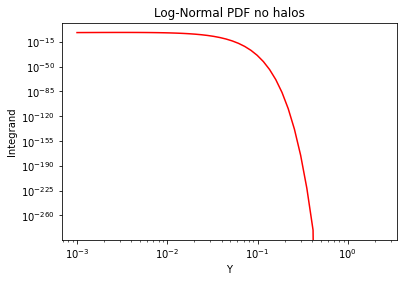

In [34]:
Y = np.geomspace(1e-3, Y_max_list[-1],len(m_1_list))

Y_list = Y.tolist()



integrand_list=np.zeros(len(Y_list))
for i, (m_1,m_2,Δ_1,Δ_2,Y) in enumerate(zip(m_1_list, m_2_list, Δ_1_list, Δ_2_list,Y_list)):
    integrand_list[i] = f2(m_1,m_2,Δ_1,Δ_2,Y)
    
plt.loglog(Y_list,integrand_list,'r')
plt.xlabel('Y')
plt.ylabel('Integrand')
plt.title('Log-Normal PDF no halos')
plt.show()

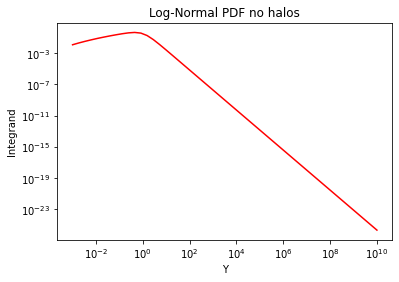

In [35]:
Y = np.geomspace(1e-3, 1e10,len(m_1_list))

Y_list = Y.tolist()



integrand_list=np.zeros(len(Y_list))
for i, (m_1,m_2,Δ_1,Δ_2,Y) in enumerate(zip(m_1_list, m_2_list, Δ_1_list, Δ_2_list,Y_list)):
    integrand_list[i]=f2(m_1,m_2,Δ_1,Δ_2,Y)
    
plt.loglog(Y_list,integrand_list,'r')
plt.xlabel('Y')
plt.ylabel('Integrand')
plt.title('Log-Normal PDF no halos')
plt.show()